# Naive Bayes Implementation

Referencias:
- http://artificiencia.com/aprenda/algoritmo-naive-bayes/
- https://chrisalbon.com/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/
- https://hackinganalytics.com/2016/10/13/desvendando-o-classificador-naive-bayes/
- https://towardsdatascience.com/naive-bayes-in-machine-learning-f49cc8f831b4

In [33]:
import pandas as pd
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')


dataset = pd.read_csv('dataset/dataset_test.csv')

dataset.head(1)

,Weather,Car,Target
0,sunny,working,1


### Funções auxiliares
- P(A | B):
    - Função auxiliar para fazer `probabilidade condicional`
- P(A):
    - Função auxiliar para fazer `probabilidade` de classe/atributo

In [2]:
def p_given_q(ds, p, q, val_p, val_q):
    p_f_zero = ds[(dataset[p]==val_p) & (ds[q]==val_q)][p].count()/ds[p][ds[q]==val_q].count()
    return p_f_zero

def p_q(ds, p,val_p):
    return ds[p][ds[p]==val_p].count()/ds[p].count()

### Variaveis auxiliares

In [3]:

# Lista com todas as colunas menos Target
list_columns = list(dataset)
list_columns.pop()

# Lista de classes do target (0 e 1)
list_value_tg = list(dataset['Target'].unique())

### Implementação do Naive Bayes

Para a criação dos dados, interajo 30 vezes, e para cada interação, utilizando uma variavel de controle ``i`` da primeira interação, eu utilizo um calculo matemático (``(80*i/30+20*(30-i)/30)/100``) que varia entre 20% até 80%.
Assim eu consigo montar 2 datasets, um de treino e outro para teste.
Para cada interação, ele vai reordenando o dataset de maneira aleatória (pandas já faz isso automaticamente) para treinar e para testar.

#### Treinar e Testar
O algoritmo para implementar o Naive Bayes, foi utilizando interando todos o dataset de ``teste`` e fazendo a seguinte formula ``P(atributo_1 | classe) x P(atributo_2 | classe) ... P(atributo_n | classe) x P(classe)`` e para todas as classes utilizando o **Maximum Likelihood** para buscar a classe com maior probabilidade e predizer o resultado.
Com o resultado desse dado eu faço a verificação com cada dataset de teste da interação

In [17]:
def naive_bayes(dataset_train, dataset_test):
    count_correct = 0
    count_incorrect = 0
    
    count_correct_zero = 0
    cont_correct_one = 0
    count_incorrect_zero = 0
    count_incorrect_one = 0
    
    for index, row in dataset_test.iterrows():
        classes = list()
        for value_tg in list_value_tg:
            prob = p_q(dataset_train,'Target',value_tg)
            
            # Multiplica cada atributo a variavel ``prob``
            for column in list_columns:
                prob *= p_given_q(dataset_train,column,'Target',row[column],value_tg)
            classes.append((value_tg, prob))

        #Result
        result = max(classes,key=lambda p: p[1])
        if result[0] == row['Target']:
            count_correct += 1
            if result[0] == 0:
                count_correct_zero += 1
            else:
                count_correct_one += 1
        else:
            count_incorrect += 1
            if result[0] == 0:
                count_incorrect_zero += 1
            else:
                count_incorrect_one += 1
    return (count_correct, count_incorrect, count_correct_zero, cont_correct_one, count_incorrect_zero, count_incorrect_one)

In [42]:
def run_nth(percentage, number):
    percentages_correct = list()
    prob_correct_zero = list()
    prob_correct_one = list()
    
    for i in range(0,number):

        # Essa função pega o dataset e separa uma fração dele, e reordena
        ds_train=dataset.sample(frac=percentage, random_state=i*randint(0,100)).reset_index()
        ds_test=dataset.drop(ds_train.index) # Pega o que sobrou do dataset de treino

        correct, incorrect, correct_zero, correct_one, incorrect_zero, incorrect_one = naive_bayes(ds_train,ds_test)
        
        if (correct_zero+incorrect_zero) != 0:
            prob_correct_zero.append(correct_zero/(correct_zero+incorrect_zero))
        
        if (correct_one+incorrect_one):
            prob_correct_one.append(correct_one/(correct_one+incorrect_one))
        
        percentages_correct.append(correct/(correct+incorrect))
    
        
    return (percentages_correct, prob_correct_zero, prob_correct_one)

### Trata o resultado do treino e teste
Faz o calculo da porcentagem de acordo com a quantidade de corretas e incorretas

In [43]:
percents, prob_zero, prob_one = run_nth(0.5,10)

### Taxa de Acerto

In [44]:
taxa_acerto_min=np.min(percents)
taxa_acerto_max=np.max(percents)
taxa_acerto_med=np.mean(percents)

print('Taxa de Acerto')
print('------------------')
print('Minimo: ' + str(taxa_acerto_min))
print('Máxima: ' + str(taxa_acerto_max))
print('Média: '+str(taxa_acerto_med))

Taxa de Acerto
------------------
Minimo: 0.2
Máxima: 0.8
Média: 0.5


### Taxa de Acerto Médio por Classe

In [45]:
taxa_acerto_zero = np.mean(prob_zero)
taxa_acerto_one = np.mean(prob_one)

print('Taxa de Acerto Médio por classe')
print('------------------')
print('Classe 0: ' + str(taxa_acerto_zero))
print('Classe 1: ' + str(taxa_acerto_one))

Taxa de Acerto Médio por classe
------------------
Classe 0: 1.0
Classe 1: 0.0


### Gráfico de acerto
Gráfico contendo a ``Probabilidade de acerto X Porcentagem do dataset de treino``.


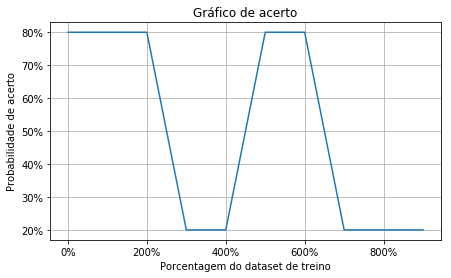

In [46]:
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

ax.plot(percents)
ax.set_title('Gráfico de acerto')

percentFormat = mtick.PercentFormatter(1)

ax.xaxis.set_major_formatter(percentFormat)
ax.yaxis.set_major_formatter(percentFormat)
ax.set_ylabel('Probabilidade de acerto')

ax.set_xlabel('Porcentagem do dataset de treino')

plt.grid(True)
plt.show()

Para cada porcentagem do dataset de treino, o restante dos dados foram utilizado para teste.
Por exemplo, caso eu tenhoa usado 20% para treino, 80% foram utilizado para teste (Não está explicito no gráfico)